In [1]:
## Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Import CSV File
team_summaries_df = pd.read_csv("Team Summaries.csv")
team_total_df = pd.read_csv("Team Totals.csv")
team_df = pd.merge(team_total_df, team_summaries_df, how='outer')
team_df.head()
pd.set_option('display.max_columns', 500)

In [3]:
#Clean/Downsize Data
team_df = team_df.dropna()
year = 2024
drop_2024_df = team_df[team_df['season'] != year]
team_reduced_df = drop_2024_df[["season", "team", "playoffs", "fg_percent", "x3p_percent", "x2p_percent", "ft_percent", "orb", "drb", "trb", "ast", "stl", "blk", "tov", "pts", "w", "l", "srs", "o_rtg", "d_rtg", "n_rtg", "f_tr", "x3p_ar", "e_fg_percent", "tov_percent", "orb_percent"
]]
columns = {
    "season": "Season",
    "team": "Team",
    "playoffs": "Playoffs",
    "fg_percent": "Field Goal Percentage",
    "x3p_percent": "Three-Point Percentage",
    "x2p_percent": "Two-Point Percentage",
    "ft_percent": "Free Throw Percentage",
    "orb": "Offensive Rebounds",
    "drb": "Defensive Rebounds",
    "trb": "Total Rebounds",
    "ast": "Assists",
    "stl": "Steals",
    "blk": "Blocks",
    "tov": "Turnovers",
    "pts": "Points",
    "w": "Wins",
    "l": "Losses",
    "srs": "Simple Rating System",
    "o_rtg": "Offensive Rating",
    "d_rtg": "Defensive Rating",
    "n_rtg": "Net Rating",
    "f_tr": "Free Throw Rate",
    "x3p_ar": "Three-Point Attempt Rate",
    "e_fg_percent": "Effective Field Goal Percentage",
    "tov_percent": "Turnover Percentage",
    "orb_percent": "Offensive Rebound Percentage"
}
team_reduced_df = team_reduced_df.rename(columns=columns)
team_reduced_df.head()


,Season,Team,Playoffs,Field Goal Percentage,Three-Point Percentage,Two-Point Percentage,Free Throw Percentage,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Points,Wins,Losses,Simple Rating System,Offensive Rating,Defensive Rating,Net Rating,Free Throw Rate,Three-Point Attempt Rate,Effective Field Goal Percentage,Turnover Percentage,Offensive Rebound Percentage
31,2023,Atlanta Hawks,False,0.483,0.352,0.548,0.818,920.0,2719.0,3639.0,2049.0,580.0,401.0,1060.0,9711.0,41.0,41.0,0.32,116.6,116.3,0.3,0.244,0.331,0.541,11.2,25.1
32,2023,Boston Celtics,False,0.475,0.377,0.567,0.812,796.0,2921.0,3717.0,2186.0,521.0,430.0,1095.0,9671.0,57.0,25.0,6.38,118.0,111.5,6.5,0.243,0.480,0.566,12.0,22.1
33,2023,Brooklyn Nets,False,0.487,0.378,0.559,0.800,674.0,2648.0,3322.0,2093.0,585.0,506.0,1127.0,9295.0,45.0,37.0,1.03,115.0,114.1,0.9,0.260,0.397,0.562,12.7,19.6
34,2023,Chicago Bulls,False,0.490,0.361,0.555,0.809,694.0,2779.0,3473.0,2006.0,644.0,371.0,1097.0,9276.0,40.0,42.0,1.37,113.5,112.2,1.3,0.251,0.333,0.550,12.2,20.1
35,2023,Charlotte Hornets,False,0.457,0.330,0.528,0.749,901.0,2751.0,3652.0,2062.0,634.0,425.0,1164.0,9098.0,27.0,55.0,-5.89,109.2,115.3,-6.1,0.261,0.360,0.516,12.3,23.8


In [4]:
##Cleaning Offensive


In [5]:
##Cleaning Defensive


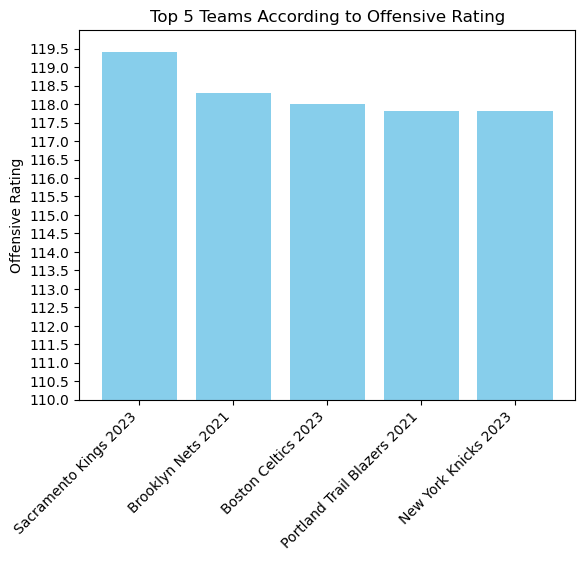

In [6]:
##Visualization Offense
##Sorting Data
team_rating = team_reduced_df.sort_values(by='Offensive Rating', ascending=False)
team_rating['Team Season'] = team_rating['Team'] + ' ' + team_rating['Season'].astype(str)
best_offense = team_rating.head(5)

##Creating Bar Graph
plt.bar(best_offense['Team Season'], best_offense['Offensive Rating'], color='skyblue', align='center')
plt.xticks(rotation=45, ha='right')
plt.ylim(110, 120)
plt.yticks(np.arange(110, 120, 0.5))
plt.ylabel('Offensive Rating')
plt.title('Top 5 Teams According to Offensive Rating')
plt.show()

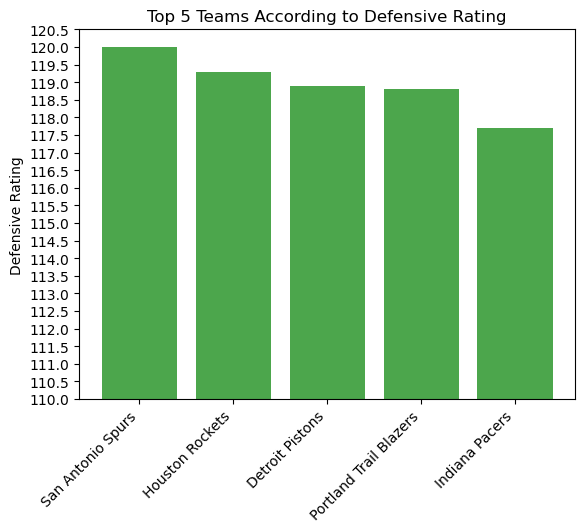

In [7]:
##Visulization Defense
##Sorting Data
team_rating = team_reduced_df.sort_values(by='Defensive Rating', ascending=False)
team_rating['Team Season'] = team_rating['Team'] + ' ' + team_rating['Season'].astype(str)
best_defense = team_rating.head(5)

##Creating Bar Graph
plt.bar(best_defense['Team'], best_defense['Defensive Rating'], color='green', alpha=0.7, align='center')
plt.xticks(rotation=45, ha='right')
plt.ylim(110, 120)
plt.yticks(np.arange(110, 121, 0.5))
plt.ylabel('Defensive Rating')
plt.title('Top 5 Teams According to Defensive Rating')
plt.show()

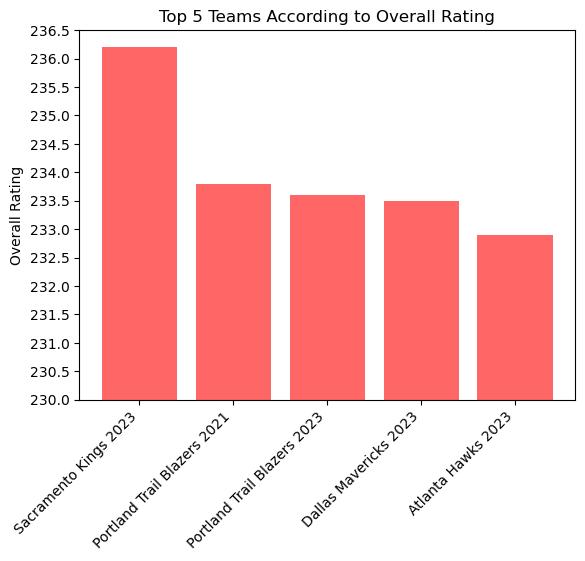

In [8]:
##Visualization Overall
##Sorting Data
team_reduced_df['Overall Rating'] = team_reduced_df['Offensive Rating'] + team_reduced_df['Defensive Rating']
team_rating = team_reduced_df.sort_values(by='Overall Rating', ascending=False)
team_rating['Team Season'] = team_rating['Team'] + ' ' + team_rating['Season'].astype(str)
best_overall = team_rating.head(5)

##Creating Bar Graph
plt.bar(best_overall['Team Season'], best_overall['Overall Rating'], color='r', alpha=0.6, align='center')
plt.xticks(rotation=45, ha='right')
plt.ylim(230, 236.5)
plt.yticks(np.arange(230, 237, 0.5))
plt.ylabel('Overall Rating')
plt.title('Top 5 Teams According to Overall Rating')
plt.show()

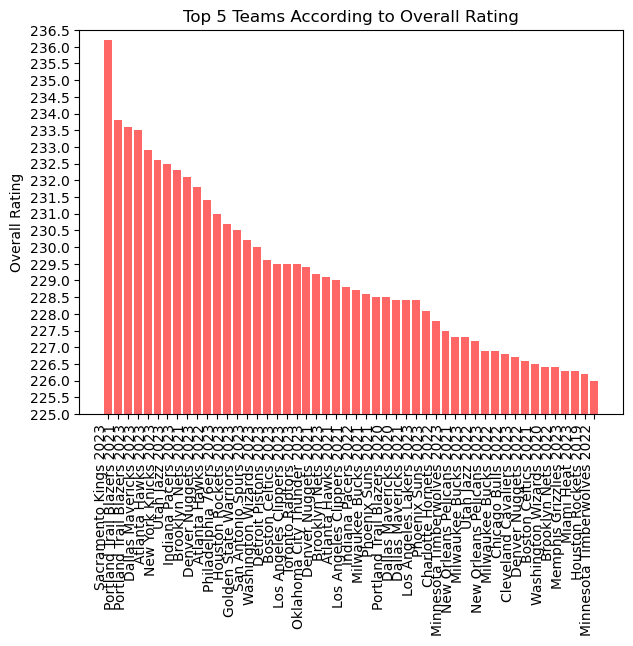

In [21]:
##Visualization Overall
##Sorting Data
team_reduced_df['Overall Rating'] = team_reduced_df['Offensive Rating'] + team_reduced_df['Defensive Rating']
team_rating = team_reduced_df.sort_values(by='Overall Rating', ascending=False)
team_rating['Team Season'] = team_rating['Team'] + ' ' + team_rating['Season'].astype(str)
best_overall = team_rating.head(50)

##Creating Bar Graph
plt.bar(best_overall['Team Season'], best_overall['Overall Rating'], color='r', alpha=0.6, align='center')
plt.xticks(rotation=90, ha='right')
plt.ylim(225, 236.5)
plt.yticks(np.arange(225, 237, 0.5))
plt.ylabel('Overall Rating')
plt.title('Top 5 Teams According to Overall Rating')
plt.show()